# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')
print(df)

          date  am   pm       target      predict
0   2020-04-17  21    2  working_day      weekend
1   2020-04-18   1   68      weekend  working_day
2   2020-04-19  18   15      weekend  working_day
3   2020-04-20   2   23  working_day  working_day
4   2020-04-21   0   25  working_day  working_day
5   2020-04-22   0   28  working_day  working_day
6   2020-04-23  10   33  working_day  working_day
7   2020-04-24   2   14  working_day  working_day
8   2020-04-25  30   74      weekend  working_day
9   2020-04-26  28  233      weekend  working_day
10  2020-04-27   4    2  working_day  working_day
11  2020-04-28   4    1  working_day  working_day
12  2020-04-29   0   17  working_day  working_day
13  2020-04-30  13   40  working_day  working_day
14  2020-05-01   8   52  working_day  working_day
15  2020-05-02  91  151      weekend  working_day
16  2020-05-03  47  133      weekend  working_day
17  2020-05-04  11   26  working_day  working_day
18  2020-05-05  81   58  working_day  working_day


In [3]:
df.info

<bound method DataFrame.info of           date  am   pm       target      predict
0   2020-04-17  21    2  working_day      weekend
1   2020-04-18   1   68      weekend  working_day
2   2020-04-19  18   15      weekend  working_day
3   2020-04-20   2   23  working_day  working_day
4   2020-04-21   0   25  working_day  working_day
5   2020-04-22   0   28  working_day  working_day
6   2020-04-23  10   33  working_day  working_day
7   2020-04-24   2   14  working_day  working_day
8   2020-04-25  30   74      weekend  working_day
9   2020-04-26  28  233      weekend  working_day
10  2020-04-27   4    2  working_day  working_day
11  2020-04-28   4    1  working_day  working_day
12  2020-04-29   0   17  working_day  working_day
13  2020-04-30  13   40  working_day  working_day
14  2020-05-01   8   52  working_day  working_day
15  2020-05-02  91  151      weekend  working_day
16  2020-05-03  47  133      weekend  working_day
17  2020-05-04  11   26  working_day  working_day
18  2020-05-05  81

In [4]:
X = df[['am', 'pm']]
y = df['target'].apply(lambda x: 1 if x == 'weekend' else 0)

In [5]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
x_min, x_max = X['am'].min() - 1, X['am'].max() + 10
y_min, y_max = X['pm'].min() - 20, X['pm'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = logreg.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)

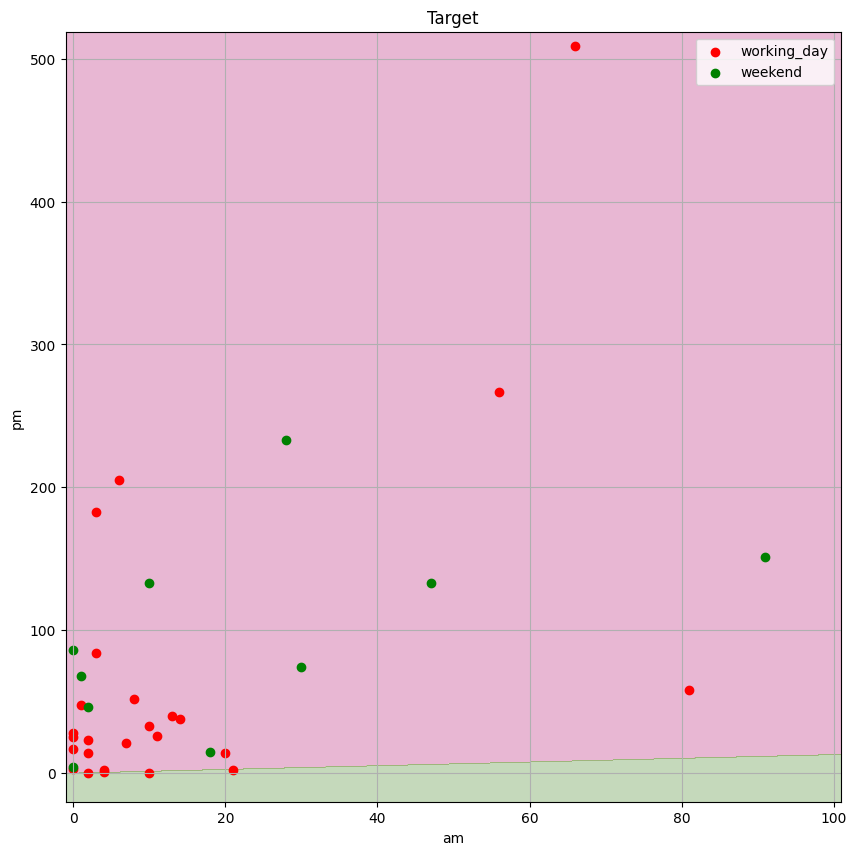

In [7]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(subset['am'], subset['pm'], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Target')
plt.legend()
plt.grid(True)
plt.show()

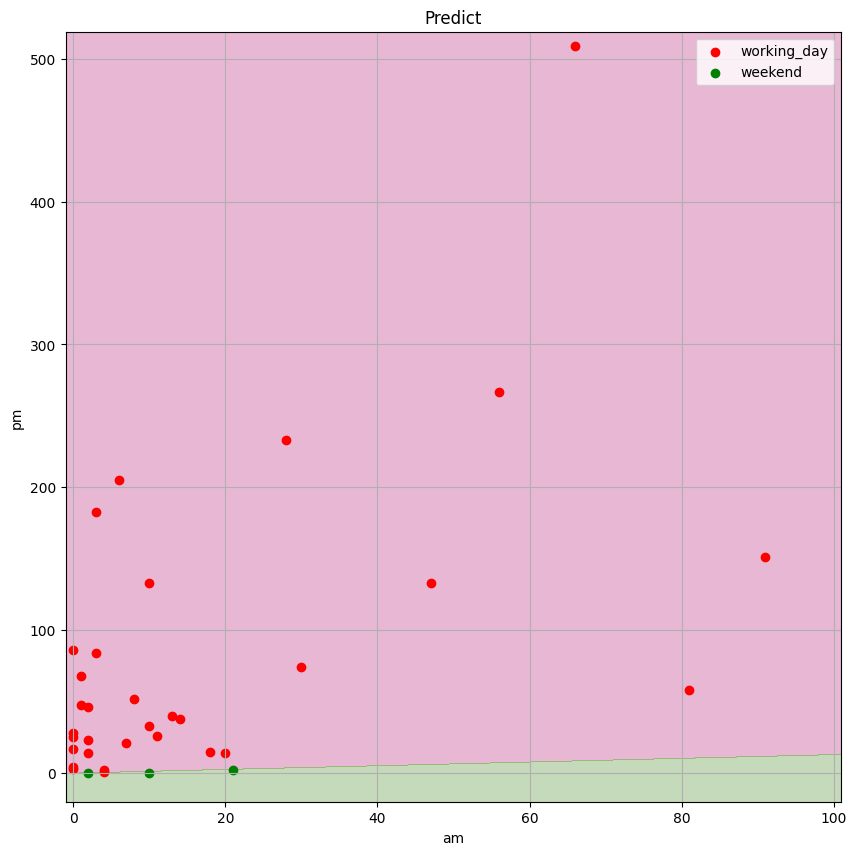

In [8]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict'] == predict]
    plt.scatter(subset['am'], subset['pm'], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Predict')
plt.legend()
plt.grid(True)
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
logreg_scaled = LogisticRegression(random_state=21, fit_intercept=False)
logreg_scaled.fit(X_scaled, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred_scaled = logreg_scaled.predict(X_scaled)
model_accuracy = accuracy_score(y, y_pred_scaled)
most_common_class = df['target'].mode()[0]
naive_accuracy = accuracy_score(df['target'], [most_common_class] * len(df))

In [12]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 1].max() + 1
y_min, y_max = X_scaled[:, 0].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

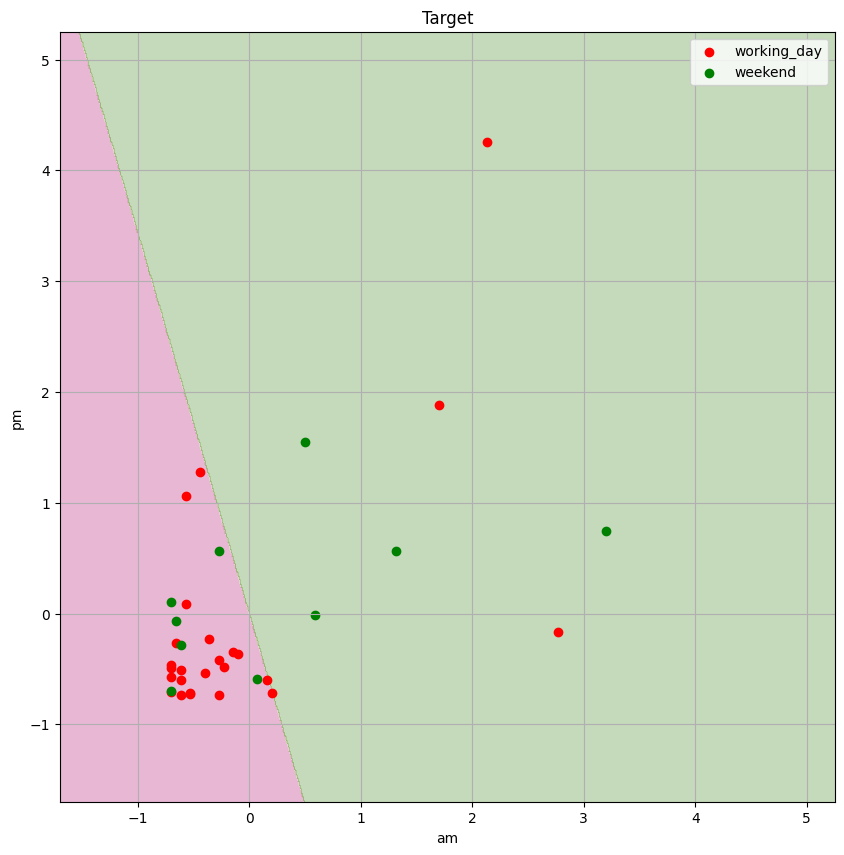

0.7428571428571429

In [13]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Target')
plt.legend()
plt.grid(True)
plt.show()  
model_accuracy

In [14]:
df['predict_scaled'] = logreg_scaled.predict(X_scaled)
df['predict_scaled'] = df['predict_scaled'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

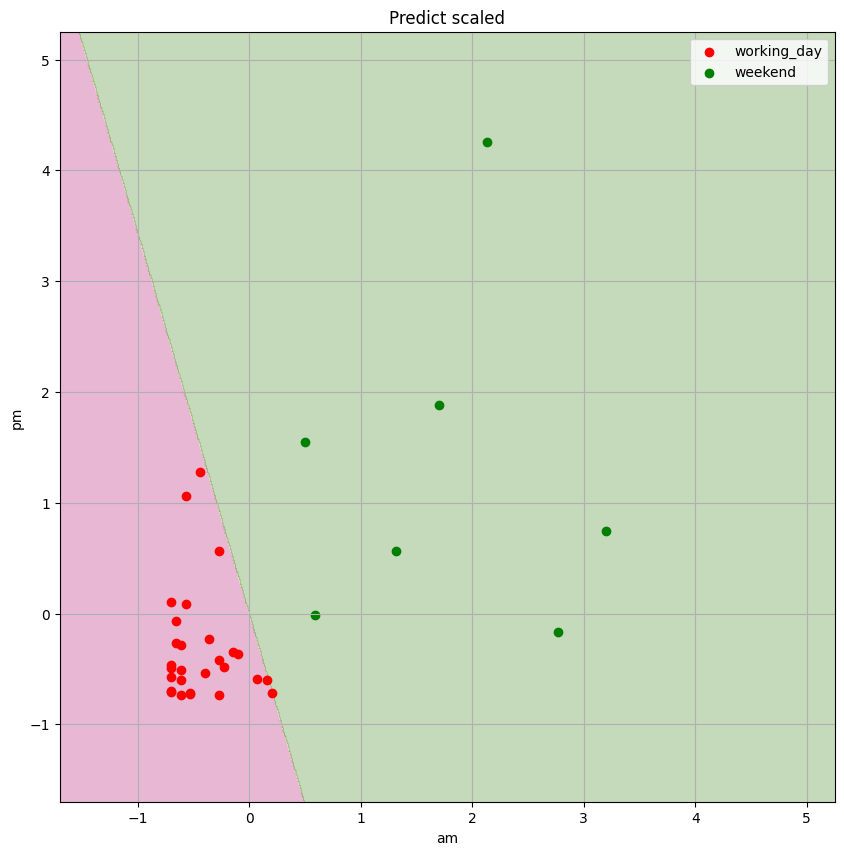

0.7428571428571429

In [15]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_scaled'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Predict scaled')
plt.legend()
plt.grid(True)
plt.show()  
model_accuracy

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = None
best_svc = None

In [17]:
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X_scaled, y)
    y_pred = svc.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f'SVC accuracy ({kernel}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_svc = svc

SVC accuracy (linear): 0.7142857142857143
SVC accuracy (poly): 0.7428571428571429
SVC accuracy (rbf): 0.7428571428571429
SVC accuracy (sigmoid): 0.6857142857142857


In [18]:
print(f'Best kernel: {best_kernel} with accuracy: {best_accuracy}')

Best kernel: poly with accuracy: 0.7428571428571429


In [19]:
Z = best_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

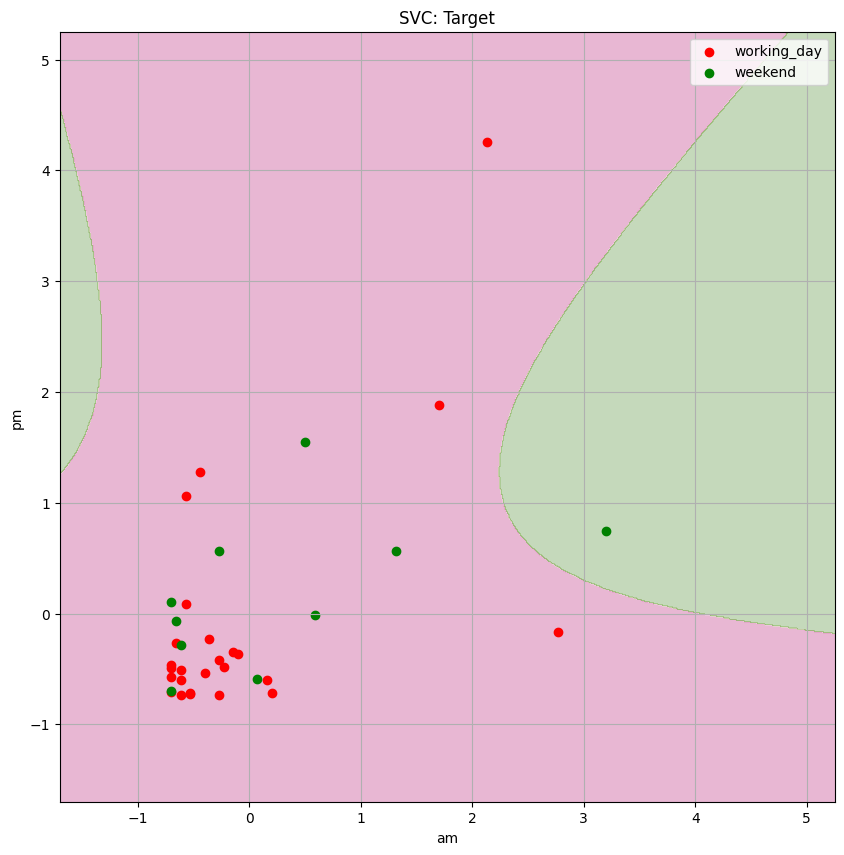

In [20]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('SVC: Target')
plt.legend()
plt.grid(True)
plt.show()  

In [21]:
df['predict_svc'] = best_svc.predict(X_scaled)
df['predict_svc'] = df['predict_svc'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

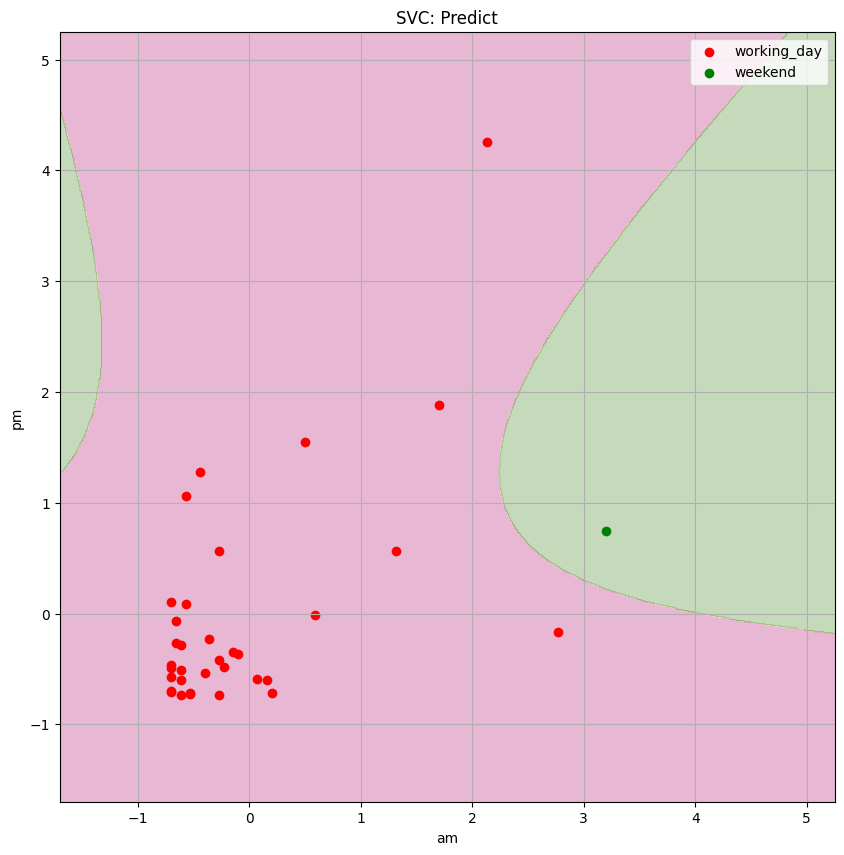

In [22]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_svc'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('SVC: Predict')
plt.legend()
plt.grid(True)
plt.show()  

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_scaled, y)
y_pred = tree.predict(X_scaled)

In [24]:
accuracy = accuracy_score(y, y_pred)

In [25]:
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

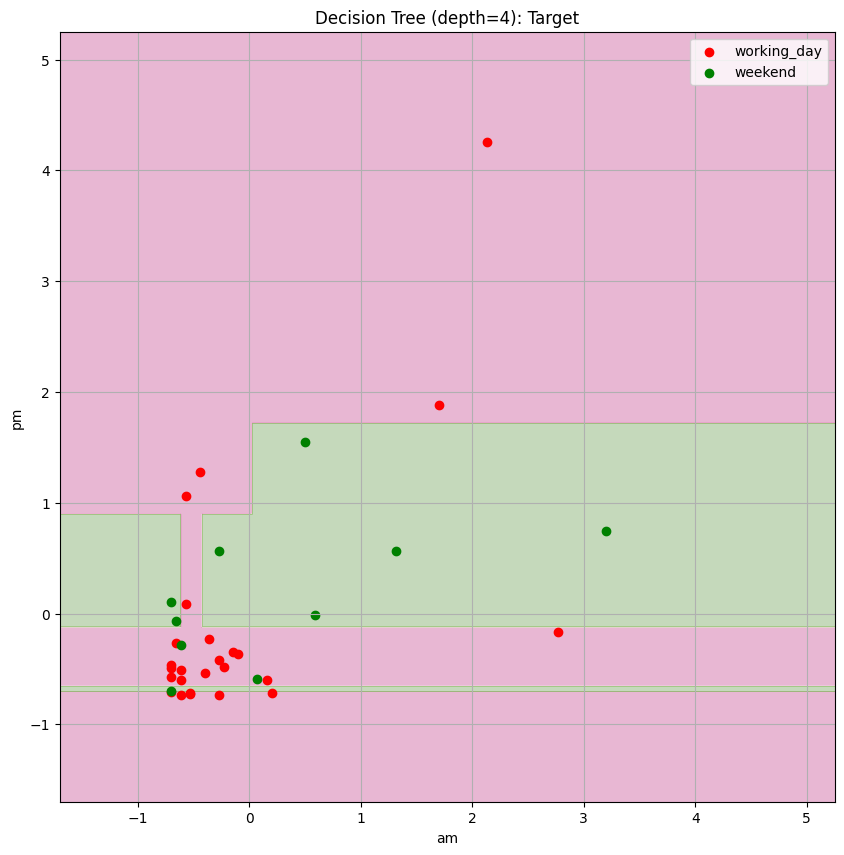

In [26]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (depth=4): Target')
plt.legend()
plt.grid(True)
plt.show()  

In [27]:
df['predict_tree'] = tree.predict(X_scaled)
df['predict_tree'] = df['predict_tree'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

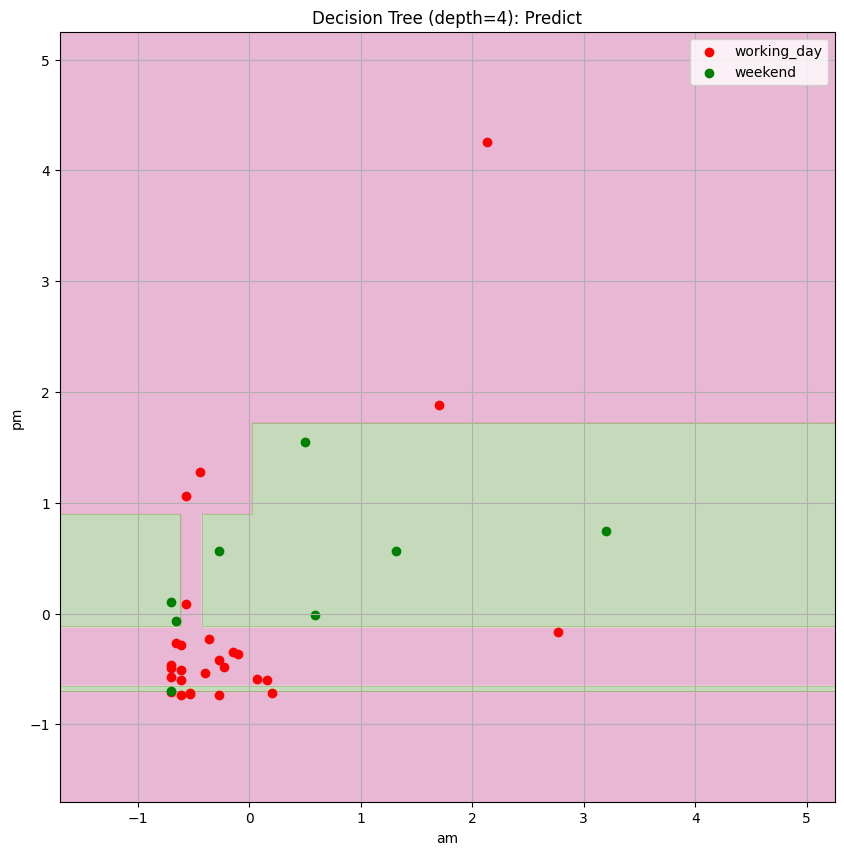

In [28]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_tree'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (depth=4): Predict')
plt.legend()
plt.grid(True)
plt.show()  

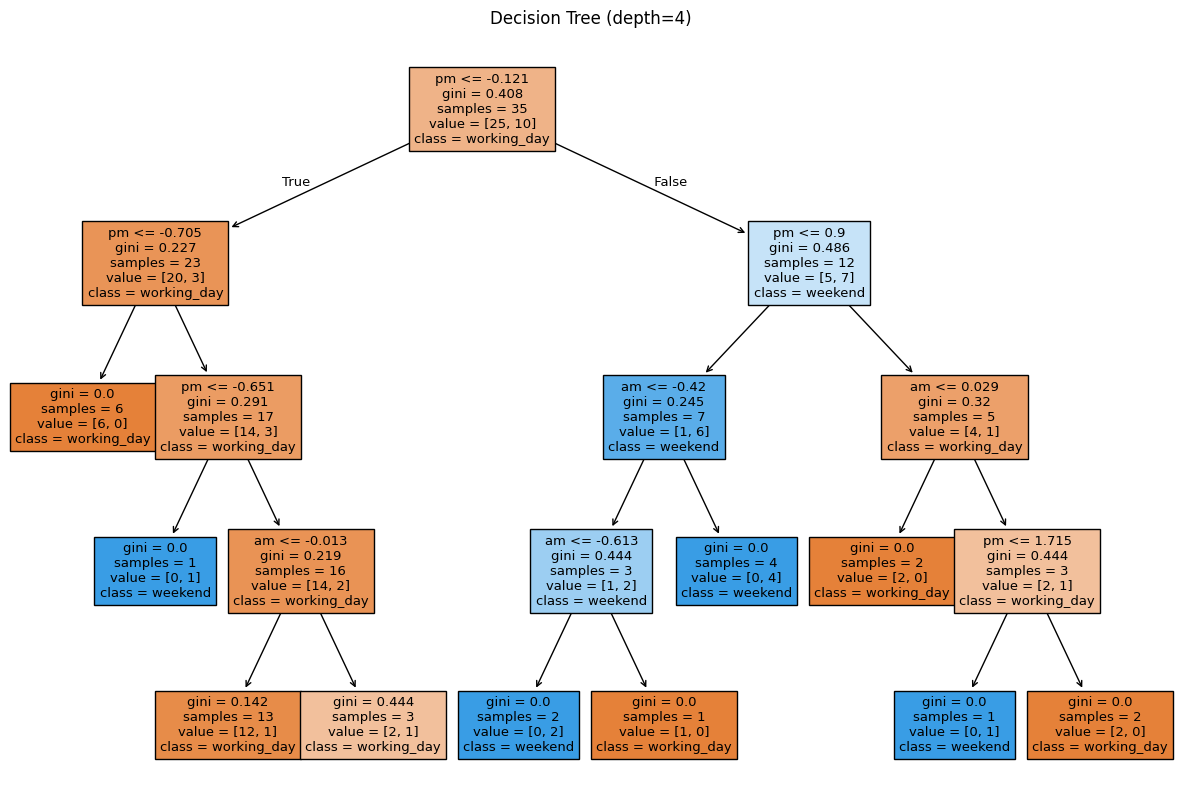

In [29]:
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(tree, feature_names=['am', 'pm'], class_names=['working_day', 'weekend'], filled=True)
plt.title(f'Decision Tree (depth=4)')
plt.show()

Answer:2

In [30]:
depths = [2, 4, 6, 8]
best_accuracy = 0
best_depth = None
best_tree = None

In [31]:
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_scaled, y)
    y_pred = tree.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f'Decision Tree accuracy (max_depth={depth}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        best_tree = tree

Decision Tree accuracy (max_depth=2): 0.8571428571428571
Decision Tree accuracy (max_depth=4): 0.9428571428571428
Decision Tree accuracy (max_depth=6): 1.0
Decision Tree accuracy (max_depth=8): 1.0


In [32]:
print(f'Best max_depth: {best_depth} with accuracy: {best_accuracy}')

Best max_depth: 6 with accuracy: 1.0


In [33]:
Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

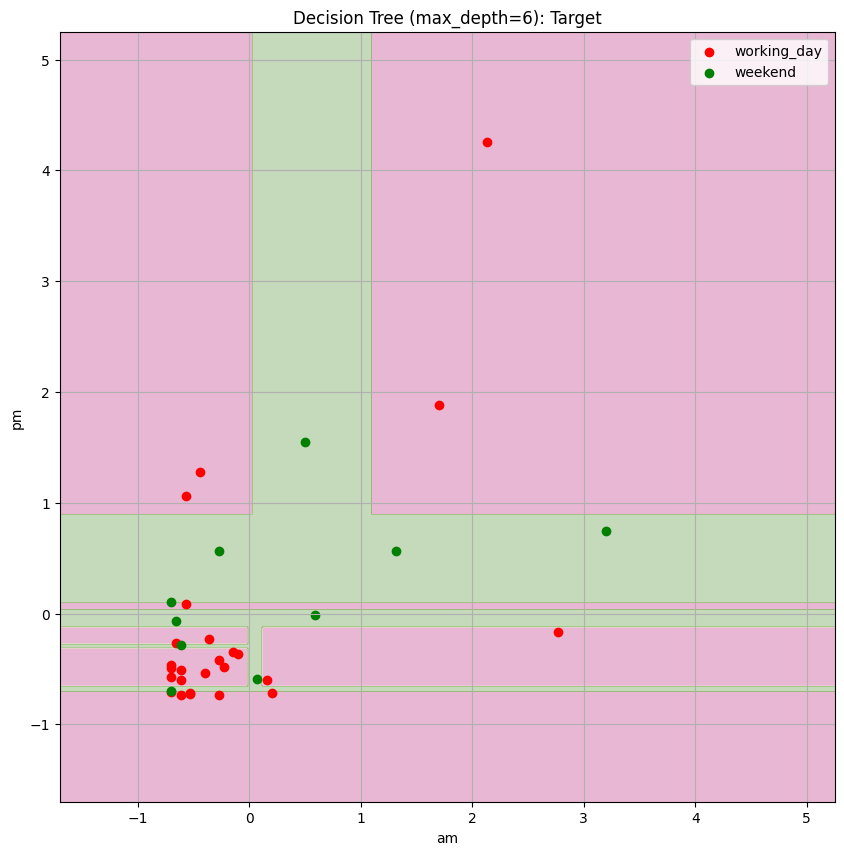

In [34]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (max_depth={best_depth}): Target')
plt.legend()
plt.grid(True)
plt.show()  

In [35]:
df['predict_tree'] = best_tree.predict(X_scaled)
df['predict_tree'] = df['predict_tree'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

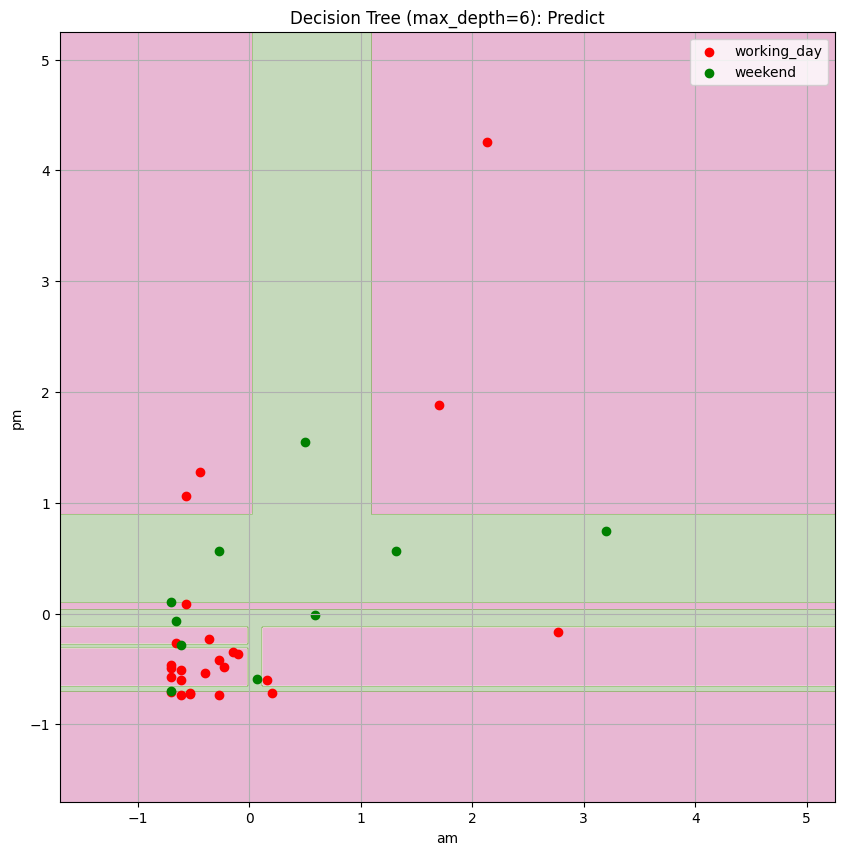

In [36]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_tree'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (max_depth={best_depth}): Predict')
plt.legend()
plt.grid(True)
plt.show()  

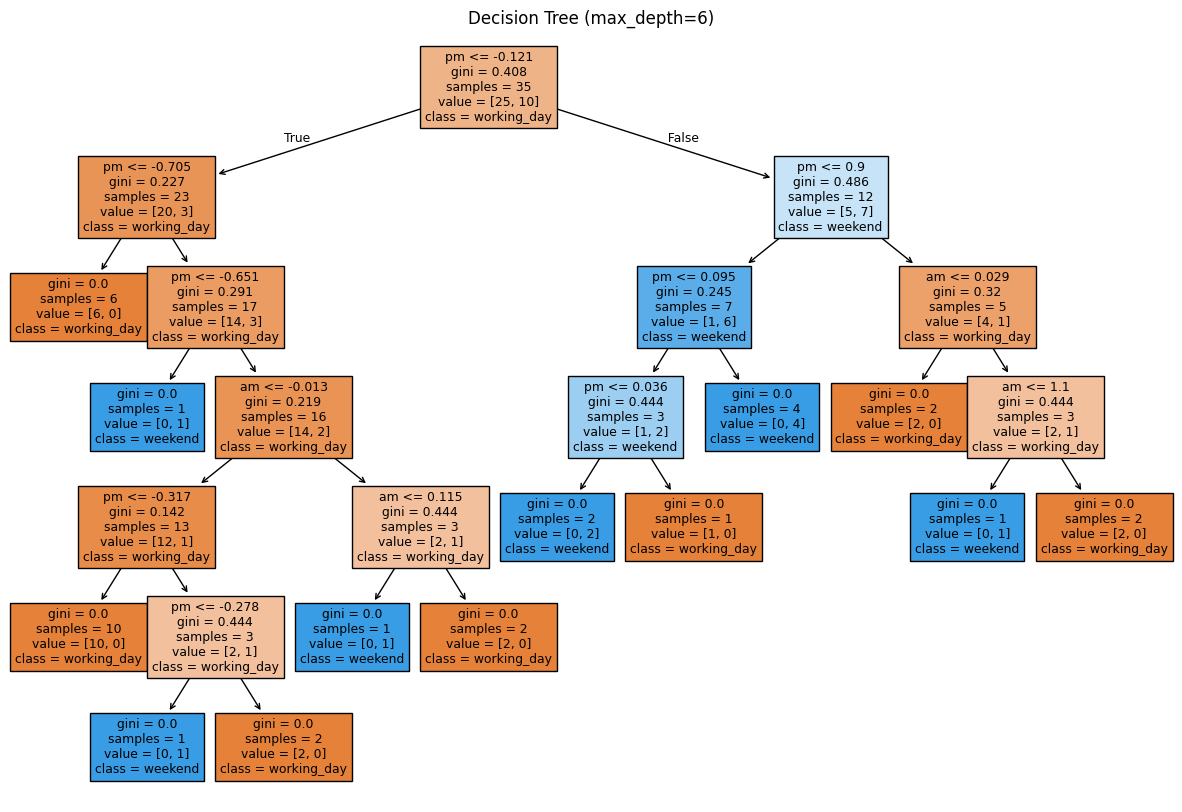

In [37]:
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(best_tree, feature_names=['am', 'pm'], class_names=['working_day', 'weekend'], filled=True)
plt.title(f'Decision Tree (max_depth={best_depth})')
plt.show()

## Answer:4